# Import all libraries
```Importing all essential libraries for this project```

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np
import sympy as smp

```Lets get started```

In [6]:

#Particle credentials:->

m=1
q=1
K=1

t=np.linspace(0.01,100,1000)

def acc(state,t):
    x,y,z,vx,vy,vz=state


    v=np.array([vx,vy,vz])
    E=np.array([0,0,0])
    #I will add the EF due to the particle itself so that i can work with cluster of particles


    B=np.array([0,0,50])

    a=(q/m)*(np.cross(v,B)+E)
    v_mod=np.linalg.norm(v)
    return vx,vy,vz,a[0],a[1],a[2]

state0=(0,0,0,4,4,0)

sol=odeint(acc,state0,t)

## Calculating some physical quantities

In [7]:
#Energy calculation
KE_list=[]
for i in range(0,1000):


    vx1,vy1,vz1=sol[i][3],sol[i][4],sol[i][5]
    v=np.linalg.norm([vx1,vy1,vz1])
    KE=0.5*m*(v**2)

    KE_list.append(KE)

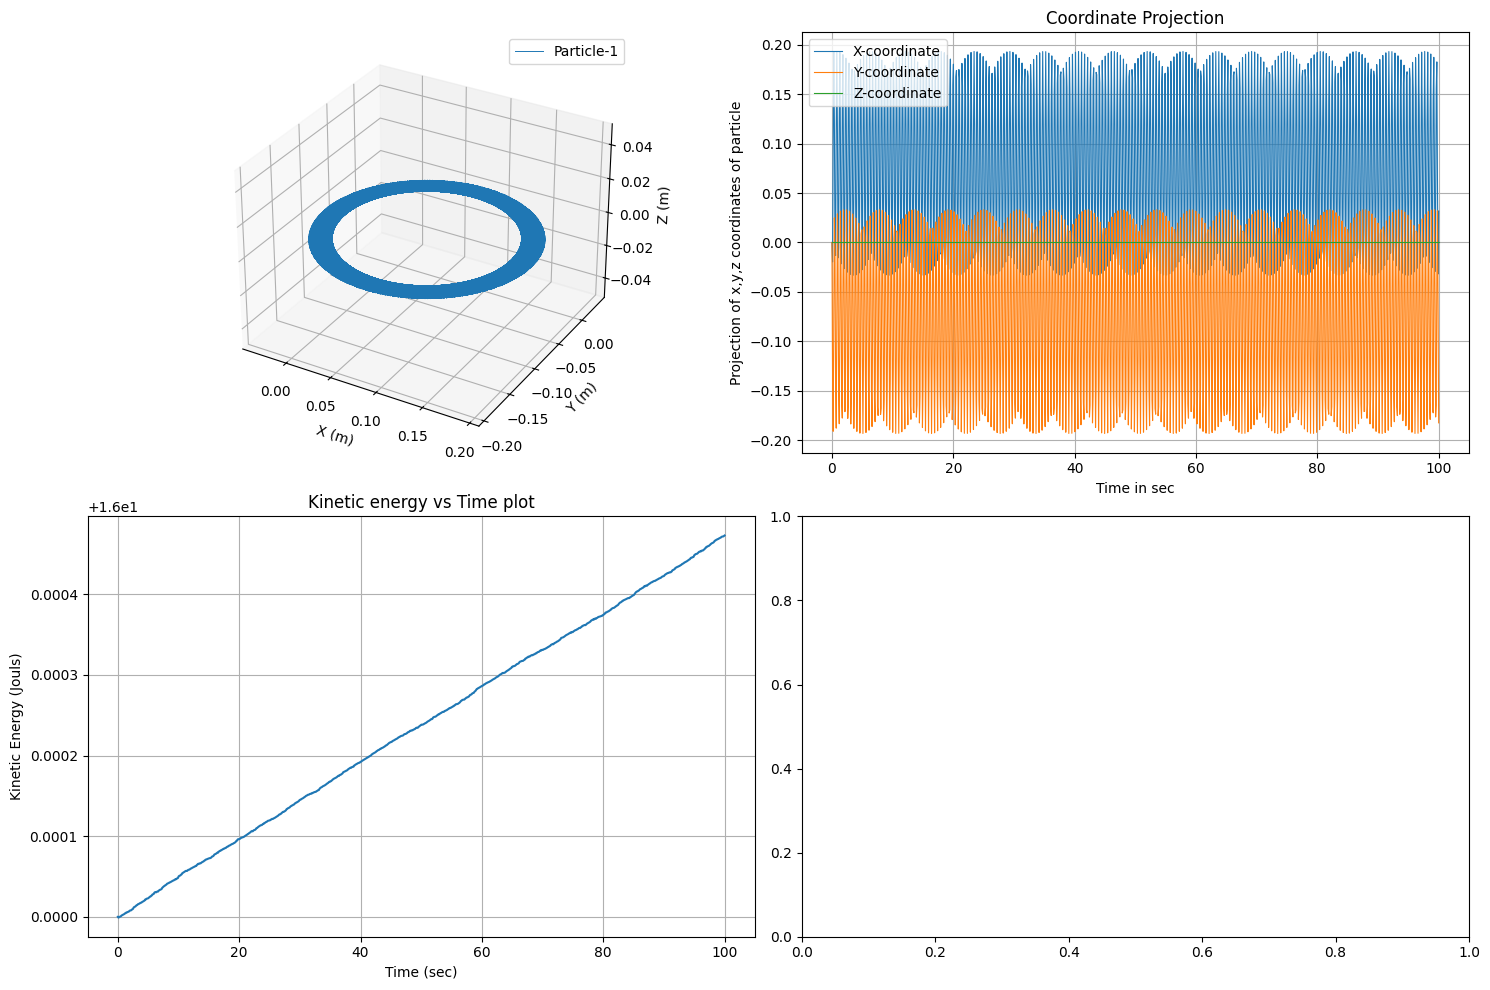

In [8]:
sol.T

fig=plt.figure(figsize=(15,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

ax.plot(sol.T[0],sol.T[1],sol.T[2],linewidth=0.7,label="Particle-1")
ax.legend()

plt.subplot(2,2,2)
plt.plot(t,sol.T[0],linewidth=0.8,label="X-coordinate")
plt.plot(t,sol.T[1],linewidth=0.8,label="Y-coordinate")
plt.plot(t,sol.T[2],linewidth=0.8,label="Z-coordinate")
plt.title("Coordinate Projection")
plt.grid("True")
plt.xlabel("Time in sec")
plt.ylabel("Projection of x,y,z coordinates of particle")
plt.legend()

plt.subplot(2,2,3)
plt.plot(t,KE_list)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Kinetic Energy (Jouls)")
plt.title("Kinetic energy vs Time plot")
plt.subplot(2,2,4)
plt.tight_layout()